In [2]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [22]:
pip install tensorflow==2.1.0

In [23]:
pip install keras==2.3.1


In [7]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
import keras.optimizers
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
# for accuracy and loss graph
import matplotlib.pyplot as plt

import tensorflow

print(keras.__version__)
print(tensorflow.__version__)

2.3.1
2.1.0


In [8]:
train_data_path = "/content/drive/My Drive/FacemaskDetection/dataset/train"
validation_data_path = "/content/drive/My Drive/FacemaskDetection/dataset/valid"

In [9]:
# Augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


In [10]:
# Augmentation configuration we will use for training
# Generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # thats the target directory
                                      target_size=(200, 200),  batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 2355 images belonging to 2 classes.


In [11]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [12]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 806 images belonging to 2 classes.


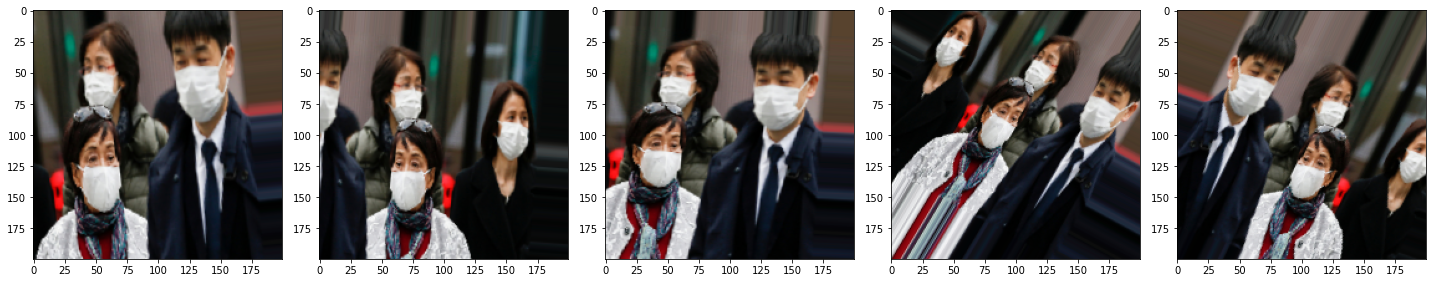

In [13]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)


In [14]:
# save best model using vall accuracy
model_path = '/content/drive/My Drive/FacemaskDetection/model/mymodel.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [15]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network building
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [16]:
# train cnn model 1st time
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/50
 2/19 [==>...........................] - ETA: 1:35 - loss: 0.7259 - accuracy: 0.4922

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


18/19 [===========================>..] - ETA: 5s - loss: 0.3926 - accuracy: 0.8406 

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/19 [==============================] - 204s 11s/step - loss: 0.3853 - accuracy: 0.8429 - val_loss: 0.5927 - val_accuracy: 0.7246

Epoch 00001: val_accuracy improved from -inf to 0.72457, saving model to /content/drive/My Drive/FacemaskDetection/model/mymodel.h5
Epoch 2/50
19/19 [==============================] - 21s 1s/step - loss: 0.2228 - accuracy: 0.9180 - val_loss: 0.9275 - val_accuracy: 0.6328

Epoch 00002: val_accuracy did not improve from 0.72457
Epoch 3/50
19/19 [==============================] - 41s 2s/step - loss: 0.1387 - accuracy: 0.9439 - val_loss: 0.7477 - val_accuracy: 0.7618

Epoch 00003: val_accuracy improved from 0.72457 to 0.76179, saving model to /content/drive/My Drive/FacemaskDetection/model/mymodel.h5
Epoch 4/50
19/19 [==============================] - 41s 2s/step - loss: 0.1080 - accuracy: 0.9546 - val_loss: 0.7208 - val_accuracy: 0.7804

Epoch 00004: val_accuracy improved from 0.76179 to 0.78040, saving model to /content/drive/My Drive/FacemaskDetection/model

In [17]:
cnn_model.save('/content/drive/My Drive/FacemaskDetection/model/mymodel_last.h5')

In [18]:
# train cnn model 1st time
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/50
 3/19 [===>..........................] - ETA: 46s - loss: 0.0578 - accuracy: 0.9740

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


19/19 [==============================] - 42s 2s/step - loss: 0.0431 - accuracy: 0.9847 - val_loss: 2.2878 - val_accuracy: 0.8263

Epoch 00001: val_accuracy did not improve from 0.86228
Epoch 2/50
19/19 [==============================] - 41s 2s/step - loss: 0.0622 - accuracy: 0.9775 - val_loss: 1.5619 - val_accuracy: 0.8400

Epoch 00002: val_accuracy did not improve from 0.86228
Epoch 3/50
19/19 [==============================] - 42s 2s/step - loss: 0.0662 - accuracy: 0.9758 - val_loss: 2.4451 - val_accuracy: 0.8474

Epoch 00003: val_accuracy did not improve from 0.86228
Epoch 4/50
19/19 [==============================] - 41s 2s/step - loss: 0.0806 - accuracy: 0.9720 - val_loss: 1.2844 - val_accuracy: 0.8536

Epoch 00004: val_accuracy did not improve from 0.86228
Epoch 5/50
19/19 [==============================] - 40s 2s/step - loss: 0.0535 - accuracy: 0.9800 - val_loss: 2.1963 - val_accuracy: 0.8300

Epoch 00005: val_accuracy did not improve from 0.86228
Epoch 6/50
19/19 [=============

In [19]:
cnn_model.save('/content/drive/My Drive/FacemaskDetection/model/mymodel1_last.h5')

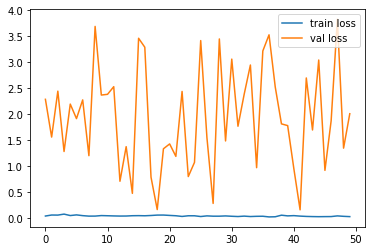

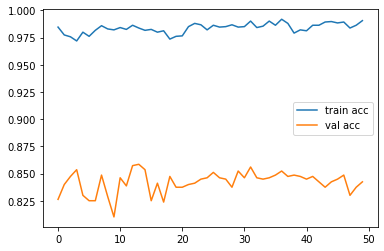

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(cnn_model.history.history['loss'], label='train loss')
plt.plot(cnn_model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn_model.history.history['accuracy'], label='train acc')
plt.plot(cnn_model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')